In [2]:
# %load deep_import.py
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, MaxPooling2D, Flatten, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [4]:
print(x_train.shape, x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


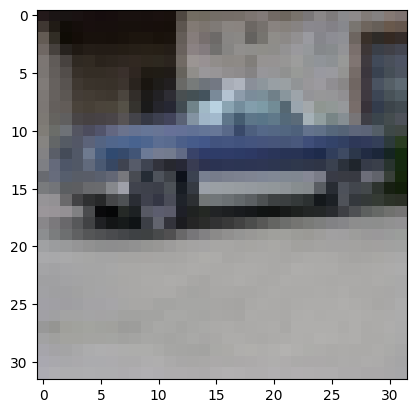

In [9]:
plt.imshow(x_train[10000])
plt.show()

In [ ]:
for x in x_train[0]:
    for i in x:
        for j in i:
            print('{:3d}'.format(j), end='')
        print()

In [ ]:
# 데이터 정규화
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print(x_train.dtype, x_test.dtype)

In [18]:
# 타겟의 클래스 개수 확인
print(np.unique(y_train))   # 10 의 클래스 확인

# x 데이터의 shape 확인
print(x_train.shape)

[0 1 2 3 4 5 6 7 8 9]
(50000, 32, 32, 3)


In [29]:
#  모델 설정
model = Sequential()
# 커널사이즈 : (3,3), 커널 개수 : 64, padding : valid, strids : 1
model.add(Conv2D(64, (3,3), input_shape = (32, 32, 3), activation='relu')) 
# 커널사이즈 : (3,3), 커널 개수 : 128, padding : valid, strids : 2
# model.add(Conv2D(128, (3,3),strides=2, activation='relu'))
model.add(Conv2D(128, (3,3),activation='relu'))
# Maxpooling size -> ( 2, 2)
model.add(MaxPooling2D(pool_size=(2,2)))
# Dropout (20%)
model.add(Dropout(0.3))
# 커널사이즈 : (3,3), 커널 개수 : 128, padding : valid, strids : 2
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# Maxpooling size -> ( 2, 2)
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 14, 14, 128)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

In [30]:
# 모델의 실행 옵션 설정
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

# 모델 최적화 설정
modelpath = './data/model/CIFA10_CNN.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                              save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

#  모델 학습 실행
history = model.fit(x_train, y_train, validation_split=0.25, epochs=1000,
                   batch_size=200, verbose=0, 
                    callbacks=[early_stopping, checkpointer])


Epoch 1: val_loss improved from inf to 1.37580, saving model to ./data/model\CIFA10_CNN.hdf5

Epoch 2: val_loss improved from 1.37580 to 1.11931, saving model to ./data/model\CIFA10_CNN.hdf5

Epoch 3: val_loss improved from 1.11931 to 0.98292, saving model to ./data/model\CIFA10_CNN.hdf5

Epoch 4: val_loss improved from 0.98292 to 0.88222, saving model to ./data/model\CIFA10_CNN.hdf5

Epoch 5: val_loss improved from 0.88222 to 0.81538, saving model to ./data/model\CIFA10_CNN.hdf5

Epoch 6: val_loss improved from 0.81538 to 0.79746, saving model to ./data/model\CIFA10_CNN.hdf5

Epoch 7: val_loss improved from 0.79746 to 0.74590, saving model to ./data/model\CIFA10_CNN.hdf5

Epoch 8: val_loss improved from 0.74590 to 0.72658, saving model to ./data/model\CIFA10_CNN.hdf5

Epoch 9: val_loss improved from 0.72658 to 0.70714, saving model to ./data/model\CIFA10_CNN.hdf5

Epoch 10: val_loss did not improve from 0.70714

Epoch 11: val_loss improved from 0.70714 to 0.68922, saving model to ./d

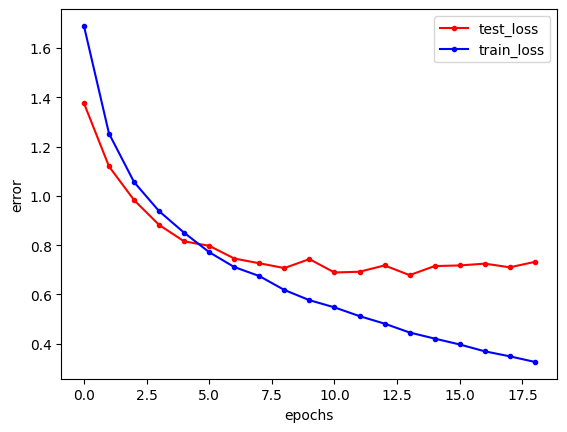

In [31]:
# 검증셋과 학습셋의 오차를 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

#  그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='test_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('error')

plt.show()

In [32]:
# 학습 정확도, 검증 정확도, 테스트 정확도 출력
print("학습 정확도 : ",history.history['accuracy'][-1])
print("검증 정확도 : ",history.history['val_accuracy'][-1])
print("테스트 정확도 : ", model.evaluate(x_test, y_test)[1])


학습 정확도 :  0.8818933367729187
검증 정확도 :  0.7782400250434875
313/313 [==============================] - 6s 19ms/step - loss: 0.7574 - accuracy: 0.7685
테스트 정확도 :  0.7684999704360962


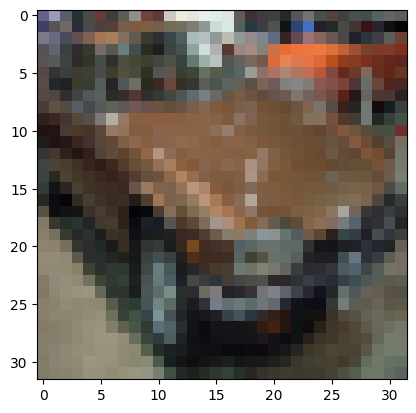

In [65]:
plt.imshow(x_test[2000])
plt.show()

In [63]:
predict_class = model.predict(x_test[1000].reshape(1,32,32,3))

1/1 [==============================] - 0s 18ms/step


In [61]:
predict_class.argmax()

6

In [64]:
predict_class

array([[7.0569516e-11, 1.1370446e-11, 4.8541820e-06, 1.4478387e-02,
        1.1640352e-06, 9.8550445e-01, 1.7861317e-06, 9.3929339e-06,
        1.4947640e-09, 2.2351976e-08]], dtype=float32)